In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [272]:
train = pd.read_csv('C:/Users/LENOVO/Downloads/Train_hMYJ020/train.csv')
test = pd.read_csv('C:/Users/LENOVO/Downloads/Test_ND2Q3bm/test.csv')

In [273]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Stay'] = le.fit_transform(train['Stay'])

In [159]:
train['Stay'].value_counts()

2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

In [274]:
train['flag'] = 1
test['flag'] = 0
test['Stay'] = None

data = pd.concat((train, test))
print(data.shape)

(455495, 19)


In [161]:
df = data.copy()

In [186]:
data=df.copy()

In [275]:
data.drop(['case_id'], axis=1, inplace=True)

In [188]:
data.loc[data['Department'].eq('gynecology') & data['Bed Grade'].isnull(), 'Bed Grade'] = 2.0
data.loc[data['Department'].eq('radiotherapy') & data['Bed Grade'].isnull(), 'Bed Grade'] = 2.0
data.loc[data['Department'].eq('TB & Chest disease') & data['Bed Grade'].isnull(), 'Bed Grade'] = 3.0
data.loc[data['Department'].eq('anesthesia') & data['Bed Grade'].isnull(), 'Bed Grade'] = 3.0

In [61]:
data['patientid'].dtypes

dtype('int64')

In [62]:
train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'flag'],
      dtype='object')

In [66]:
x = data.loc[data['Hospital_region_code']=='X', :]

In [67]:
y = data.loc[data['Hospital_region_code']=='Y', :]
z = data.loc[data['Hospital_region_code']=='Z', :]

In [68]:
print('mode for X:{}'.format(x['City_Code_Patient'].mode()))
print('mode for Z:{}'.format(z['City_Code_Patient'].mode()))
print('mode for Y:{}'.format(y['City_Code_Patient'].mode()))


mode for X:0    8.0
dtype: float64
mode for Z:0    8.0
dtype: float64
mode for Y:0    8.0
dtype: float64


In [189]:
data['City_Code_Patient'] = np.where(data['City_Code_Patient'].isna(), 8.0, data['City_Code_Patient'])

In [190]:
data['Bed Grade'] = data['Bed Grade'].astype(int)
data['City_Code_Patient'] = data['City_Code_Patient'].astype(int)
data['Admission_Deposit'] = data['Admission_Deposit'].astype(int)

In [191]:
cat = data.select_dtypes(['object']).columns
cat

Index(['Age', 'Department', 'Hospital_region_code', 'Hospital_type_code',
       'Severity of Illness', 'Stay', 'Type of Admission',
       'Ward_Facility_Code', 'Ward_Type'],
      dtype='object')

In [192]:
cat = ['Age', 'Department', 'Hospital_region_code', 'Hospital_type_code',
       'Severity of Illness', 'Type of Admission',
       'Ward_Facility_Code', 'Ward_Type']

In [193]:
data = pd.get_dummies(data, columns=cat, drop_first=False)

In [194]:
data.shape

(455495, 53)

In [195]:
train, test = data[data.flag==1], data[data.flag==0]

In [196]:
train.drop(['flag'],axis=1, inplace=True)
test = test.drop(['flag', 'Stay'], axis=1)

In [197]:
print(train.shape, test.shape)

(318438, 52) (137057, 51)


In [198]:
train['Stay'].dtypes

dtype('O')

In [199]:
train['Stay'] = train['Stay'].astype(int)

In [200]:
#from sklearn.model_selection import train_test_split
df_train, df_eval = train_test_split(train, test_size=0.2, shuffle=True, stratify=train['Stay'], random_state=500)

In [81]:
train.dtypes

Admission_Deposit                    int32
Available Extra Rooms in Hospital    int64
Bed Grade                            int32
City_Code_Hospital                   int64
City_Code_Patient                    int32
Hospital_code                        int64
Stay                                 int32
Visitors with Patient                int64
patientid                            int64
Age_0-10                             uint8
Age_11-20                            uint8
Age_21-30                            uint8
Age_31-40                            uint8
Age_41-50                            uint8
Age_51-60                            uint8
Age_61-70                            uint8
Age_71-80                            uint8
Age_81-90                            uint8
Age_91-100                           uint8
Department_TB & Chest disease        uint8
Department_anesthesia                uint8
Department_gynecology                uint8
Department_radiotherapy              uint8
Department_

In [201]:
feature_cols = df_train.columns.tolist()

In [202]:
len(feature_cols)

52

In [203]:
feature_cols.remove('Stay')
label_col = 'Stay'
print(feature_cols)

['Admission_Deposit', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Hospital', 'City_Code_Patient', 'Hospital_code', 'Visitors with Patient', 'patientid', 'Age_0-10', 'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100', 'Department_TB & Chest disease', 'Department_anesthesia', 'Department_gynecology', 'Department_radiotherapy', 'Department_surgery', 'Hospital_region_code_X', 'Hospital_region_code_Y', 'Hospital_region_code_Z', 'Hospital_type_code_a', 'Hospital_type_code_b', 'Hospital_type_code_c', 'Hospital_type_code_d', 'Hospital_type_code_e', 'Hospital_type_code_f', 'Hospital_type_code_g', 'Severity of Illness_Extreme', 'Severity of Illness_Minor', 'Severity of Illness_Moderate', 'Type of Admission_Emergency', 'Type of Admission_Trauma', 'Type of Admission_Urgent', 'Ward_Facility_Code_A', 'Ward_Facility_Code_B', 'Ward_Facility_Code_C', 'Ward_Facility_Code_D', 'Ward_Facility_Code_E', 'Ward_Facility_Code_F',

In [204]:
cat_cols = feature_cols
cat_cols.remove('Admission_Deposit')

In [205]:
params = {}
params['learning_rate'] = 0.06
params['max_depth'] = 50
params['n_estimators'] = 500
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.8
params['random_state'] = 500
params['colsample_bytree'] = 0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.6
params['reg_lambda'] = 1.1

In [206]:
import lightgbm as lgb

In [207]:
from sklearn.metrics import accuracy_score

In [208]:
clf = lgb.LGBMClassifier(**params)

clf.fit(df_train[feature_cols], df_train[label_col], 
       early_stopping_rounds=100, 
       eval_set=[(df_train[feature_cols], df_train[label_col]), (df_eval[feature_cols], df_eval[label_col])], 
       eval_metric='multi_error', verbose=True, categorical_feature=cat_cols)

eval_score = accuracy_score(df_eval[label_col], clf.predict(df_eval[feature_cols]))


[1]	valid_0's multi_error: 0.725248	valid_0's multi_logloss: 1.87249	valid_1's multi_error: 0.725254	valid_1's multi_logloss: 1.87315
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.725248	valid_0's multi_logloss: 1.85041	valid_1's multi_error: 0.725254	valid_1's multi_logloss: 1.8517
[3]	valid_0's multi_error: 0.717535	valid_0's multi_logloss: 1.83209	valid_1's multi_error: 0.717529	valid_1's multi_logloss: 1.83372
[4]	valid_0's multi_error: 0.702006	valid_0's multi_logloss: 1.8214	valid_1's multi_error: 0.701105	valid_1's multi_logloss: 1.82342
[5]	valid_0's multi_error: 0.692428	valid_0's multi_logloss: 1.80634	valid_1's multi_error: 0.690083	valid_1's multi_logloss: 1.80871
[6]	valid_0's multi_error: 0.690049	valid_0's multi_logloss: 1.78968	valid_1's multi_error: 0.688481	valid_1's multi_logloss: 1.79235
[7]	valid_0's multi_error: 0.684754	valid_0's multi_logloss: 1.77643	valid_1's multi_error: 0.683802	valid_1's multi_logloss: 1.77944
[8

In [209]:
print('Eval Accuracy :{}'.format(eval_score))

Eval Accuracy :0.4250094209270192


In [210]:
best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
print(params)

{'learning_rate': 0.06, 'max_depth': 50, 'n_estimators': 500, 'objective': 'multiclass', 'boosting_type': 'gbdt', 'subsample': 0.8, 'random_state': 500, 'colsample_bytree': 0.7, 'min_data_in_leaf': 55, 'reg_alpha': 1.6, 'reg_lambda': 1.1}


In [211]:
best_iter

500

In [212]:
df_train1 = pd.concat((df_train, df_eval))

In [213]:
clf = lgb.LGBMClassifier(**params)
clf.fit(df_train1[feature_cols], df_train1[label_col], eval_metric='multi_error', 
       verbose=True, categorical_feature=cat_cols)

eval_Score_Acc = accuracy_score(df_train1[label_col], clf.predict(df_train1[feature_cols]))

print('Acc score: {}'.format(eval_Score_Acc))

Acc score: 0.45569310195391255


In [214]:
preds = clf.predict(test[feature_cols])

In [42]:
import matplotlib.pyplot as plt

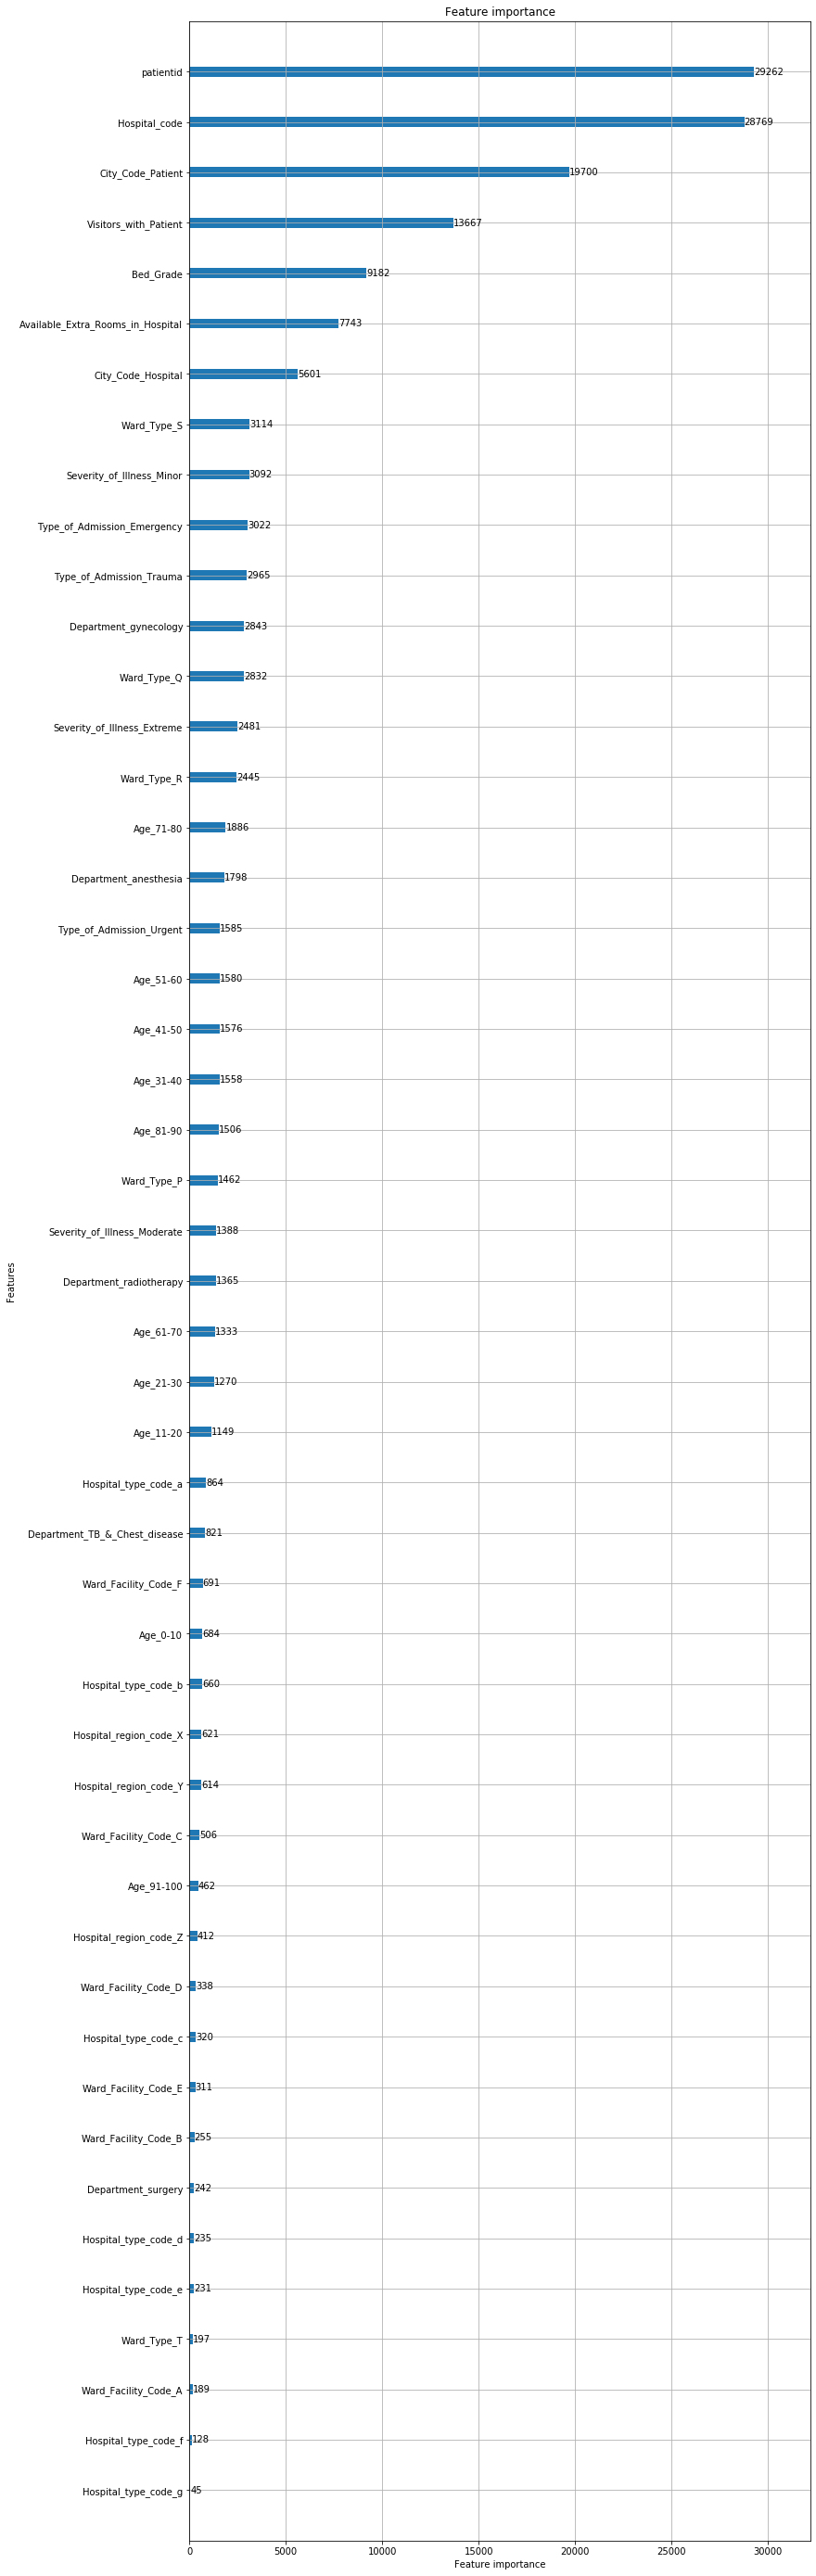

In [215]:
plt.rcParams['figure.figsize'] = (12,50)
lgb.plot_importance(clf)
plt.show()

In [216]:
preds = le.inverse_transform(preds)

In [217]:
preds

array(['21-30', '51-60', '21-30', ..., '11-20', '11-20', '51-60'],
      dtype=object)

In [46]:
test1 = pd.read_csv('C:/Users/LENOVO/Downloads/Test_ND2Q3bm/test.csv')

In [218]:
sub5 = pd.DataFrame({'case_id':test1.case_id, 'Stay':preds})

In [219]:
sub2.head()

,case_id,Stay
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [220]:
sub5.to_csv('sub5.csv', index=False)

In [124]:
sub2.to_csv('sub2.csv', index=False)

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [225]:
params

{'learning_rate': 0.06,
 'max_depth': 50,
 'n_estimators': 500,
 'objective': 'multiclass',
 'boosting_type': 'gbdt',
 'subsample': 0.8,
 'random_state': 500,
 'colsample_bytree': 0.7,
 'min_data_in_leaf': 55,
 'reg_alpha': 1.6,
 'reg_lambda': 1.1}

In [233]:
params1 = params.copy()

In [235]:
param_test = {'learning_rate':[0.05,0.06,0.08,0.1], 
             'max_depth':[30,50,70,100,150], 
             'n_estimators':[400, 500, 300], 
             'colsample_bytree':[0.7,0.8,0.9], 
             'reg_alpha':[1.6, 1.4, 1.8, 2.0], 
             'reg_lambda':[1.0, 1.1, 1.2, 1.5, 1.8], 
             'subsample':[0.7, 0.8, 0.9]}

gs = RandomizedSearchCV(
    estimator=clf1, param_distributions=param_test, 
    n_iter=100,
    scoring='accuracy',
    cv=3,
    refit=True,
    random_state=500,
    verbose=True)

In [234]:
clf1 = lgb.LGBMClassifier(randon_state=500, metric='multi_error')

In [236]:
gs.fit(df_train[feature_cols], df_train[label_col], **params1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TypeError: fit() got an unexpected keyword argument 'learning_rate'

In [133]:
import sklearn.metrics as skm

In [134]:
skm.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [276]:
data.drop(['patientid'], axis=1, inplace=True)

In [277]:
data = data.fillna(0)

In [278]:
data.apply(lambda x: sum(x.isnull()))

Admission_Deposit                    0
Age                                  0
Available Extra Rooms in Hospital    0
Bed Grade                            0
City_Code_Hospital                   0
City_Code_Patient                    0
Department                           0
Hospital_code                        0
Hospital_region_code                 0
Hospital_type_code                   0
Severity of Illness                  0
Stay                                 0
Type of Admission                    0
Visitors with Patient                0
Ward_Facility_Code                   0
Ward_Type                            0
flag                                 0
dtype: int64

In [292]:
train, test = data[data.flag==1], data[data.flag==0]

In [293]:
target = train['Stay']

In [294]:
train.drop(['Stay'], axis=1, inplace=True)

In [295]:
train.columns

Index(['Admission_Deposit', 'Age', 'Available Extra Rooms in Hospital',
       'Bed Grade', 'City_Code_Hospital', 'City_Code_Patient', 'Department',
       'Hospital_code', 'Hospital_region_code', 'Hospital_type_code',
       'Severity of Illness', 'Type of Admission', 'Visitors with Patient',
       'Ward_Facility_Code', 'Ward_Type', 'flag'],
      dtype='object')

In [296]:
test.drop(['Stay'], axis=1, inplace=True)

In [291]:
need_to_encode = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness']
for column in need_to_encode:
    le = LabelEncoder()
    le.fit(data[column])
    data[column] = le.transform(data[column])

In [290]:
data.loc[data['Age'] == '0-10', 'Age'] = 0
data.loc[data['Age'] == '11-20', 'Age'] = 1
data.loc[data['Age'] == '21-30', 'Age'] = 2
data.loc[data['Age'] == '31-40', 'Age'] = 3
data.loc[data['Age'] == '41-50', 'Age'] = 4
data.loc[data['Age'] == '51-60', 'Age'] = 5
data.loc[data['Age'] == '61-70', 'Age'] = 6
data.loc[data['Age'] == '71-80', 'Age'] = 7
data.loc[data['Age'] == '81-90', 'Age'] = 8
data.loc[data['Age'] == '91-100', 'Age'] = 9

In [289]:
categorical = ['Hospital_code', 'Hospital_code', 'Hospital_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 
              'City_Code_Patient', 'Type of Admission', 'Severity of Illness']

In [297]:
X, X_val, y, y_val = train_test_split(train, target, random_state=0, test_size=0.2, shuffle=True)
y=y.astype('int')
y_val=y_val.astype('int')

In [265]:
type(train)

pandas.core.frame.DataFrame

In [298]:
model = lgb.LGBMClassifier(random_state=666)
model.fit(X, y, categorical_feature=categorical)
preds = model.predict(X_val)
print('LGBM accuracy: ', accuracy_score(y_val, preds)*100, '%')

LGBM accuracy:  42.78042959427208 %


In [299]:
pred1 = model.predict(test)

In [300]:
pred1 = le.inverse_transform(pred1)

ValueError: y contains previously unseen labels: [ 3  4  5  6  7  8  9 10]

In [302]:
type(pred1)

numpy.ndarray

In [303]:
pred1[:10]

array([0, 5, 2, 2, 5, 2, 2, 2, 2, 2])

In [304]:
target.head()

0    0
1    4
2    3
3    4
4    4
Name: Stay, dtype: int64

In [305]:
type(preds)

numpy.ndarray

In [306]:
preds[:5]

array([1, 2, 2, 1, 2])